# Download data from Kaggle

In [105]:
!pip install kaggle

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 58 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 10.3 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=614effb71bc49da6281ed0f47d44ea59d86d15892e2cb843f9de48fddd9b39c2
  Stored in directory: /home/ec2-user/.cache/pip/wheels/77/47/e4/44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b
Successfully built kaggle
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei

In [5]:
!kaggle competitions download -c nlp-getting-started

  0%|                                                | 0.00/593k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 593k/593k [00:00<00:00, 47.2MB/s]


In [7]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Read Dataframe

In [126]:
import pandas as pd
import numpy as np
import time
import os
import sklearn
import tensorflow as tf
print(tf.__version__)
tf_framework_version = tf.__version__

1.15.5


In [127]:
print(f"pandas version == {pd.__version__}")
print(f"numpy version == {np.__version__}")
print(f"tensorflow version == {tf.__version__}")
print(f"seaborn version == {sns.__version__}")
print(f"sklearn version == {sklearn.__version__}")

pandas version == 1.1.5
numpy version == 1.19.5
tensorflow version == 1.15.5
seaborn version == 0.11.2
sklearn version == 0.22.1


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploratory analysis

In [14]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
train_df.shape,test_df.shape

((7613, 5), (3263, 4))

In [17]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [18]:
train_df['target'].value_counts(normalize = True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [7]:
train_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [19]:
print(train_df.isna().mean())

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64


In [9]:
print(test_df.isna().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


In [3]:
# fill-in a placeholder for missing values
for i in ['keyword','location']:
    train_df[i].fillna("Missing", inplace=True)
    test_df[i].fillna("Missing", inplace=True)

In [4]:
# check if NA is filled
print(train_df.isna().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [24]:
!pip install -U seaborn

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 292 kB 41.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/bin/python -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'Bottom 5 keywords that point to actual disasters')

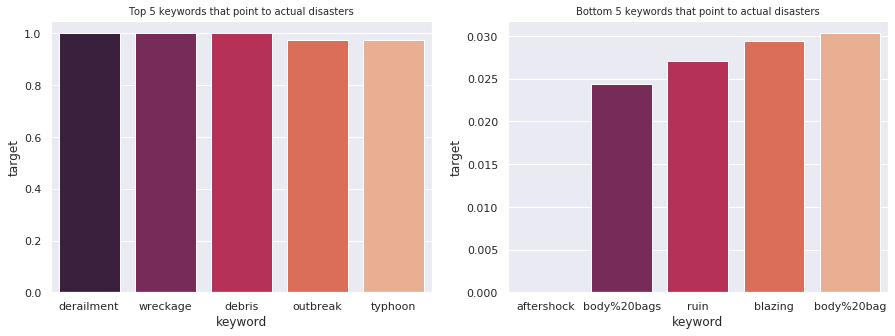

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})

# Check the distribution of actual disasters by keyword
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
data = train_df.groupby('keyword')['target'].mean().sort_values(ascending = False).reset_index().iloc[0:5]
sns.barplot(x=data['keyword'], y=data['target'], palette="rocket", ax = ax1)
ax1.set_title("Top 5 keywords that point to actual disasters", fontsize = 10)

data = train_df.groupby('keyword')['target'].mean().sort_values(ascending = True).reset_index().iloc[0:5]
sns.barplot(x=data['keyword'], y=data['target'], palette="rocket", ax = ax2)
ax2.set_title("Bottom 5 keywords that point to actual disasters", fontsize = 10)

In [33]:
# Check the distribution of actual disasters by location
train_df.groupby('location')['target'].mean().sort_values(ascending = False)

location
åø\_(?)_/åø                      1.0
Livingston, IL  U.S.A.           1.0
Magnolia, Fiore                  1.0
Maharashtra                      1.0
Malang                           1.0
                                ... 
Liberty Lake, WA                 0.0
Liberty Township, Ohio           0.0
Light and dark, form and void    0.0
Like us on Face                  0.0
Mid West                         0.0
Name: target, Length: 3342, dtype: float64

In [35]:
# Check the most common words in the text columns
from collections import Counter
results = Counter()
train_df['text'].str.lower().str.split().apply(results.update)
print(results.most_common(10))

[('the', 3207), ('a', 2135), ('in', 1949), ('to', 1934), ('of', 1814), ('and', 1405), ('i', 1336), ('is', 930), ('for', 880), ('on', 834)]


In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [49]:
# Check what is the word length without the Stop words
train_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])).apply(len).describe()

count    7613.000000
mean       86.687640
std        30.894399
min         5.000000
25%        65.000000
50%        90.000000
75%       112.000000
max       145.000000
Name: text, dtype: float64

In [50]:
# Same thing, but with Test df
test_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])).apply(len).describe()

count    3263.000000
mean       88.047809
std        31.147631
min         5.000000
25%        67.000000
50%        91.000000
75%       114.000000
max       149.000000
Name: text, dtype: float64

In [52]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet,stopwords
 
nltk.download('punkt')
 
def cleanStr(text):
    """
    Clean the string and return clean text
    """  
    text = text.lower() # lowercase
    text = text.replace(r"\#","") # replaces hashtags
    text = text.replace(r"http\S+","URL")  # remove URL addresses
    text = text.replace(r"@","")
    text = text.replace(r"[^A-Za-z0-9()!?\'\`\"]", " ")
    text = text.replace("\s{2,}", " ")
    return text


def tokenize(text):
    """
    Tokenizers divide strings into list of substrings
    """
    tokens = []
    text = cleanStr(text)
    words = word_tokenize(text)
    for word in words:
        tokens.append(word)
    return tokens


def createVocabulary(text_list):
    """
    Create a vocab after tokenizing the sentence
    """
    vocab = {}
    counter = 0
    for sentence in text_list:
        for token in tokenize(sentence):
            if token not in vocab:
                vocab[token] = counter
                counter += 1    
    return vocab


def transformText(text, vocab, max_length):
    """
    Transform the sentence into a list, where the value is checked against the vocabulary
    """
    token_arr = np.zeros((max_length,))
    tokens = tokenize(text)[0:max_length]
    for idx, token in enumerate(tokens):
        try:
            # Use the vocabulary index of the token
            token_arr[idx] = vocab[token]
        except:
            token_arr[idx] = 0 # Unknown word
    return token_arr

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
# Tranform the texts for both the Training and Testing df
max_length = 150

# Concat the keyword into combine text 
train_df['combine_text'] = train_df.apply(lambda x:x['text'] + " " + x['keyword'], axis = 1)
test_df['combine_text'] = train_df.apply(lambda x:x['text'] + " " + x['keyword'], axis = 1)
 
print("Creating the vocabulary")
vocab = createVocabulary(train_df['combine_text'])
print("Transforming training texts")
train_text_transformed = np.array([transformText(text, vocab, max_length) for text in train_df['combine_text']]).astype(int)
print("Transforming test texts")
test_text_transformed = np.array([transformText(text, vocab, max_length) for text in test_df["combine_text"]]).astype(int)

Creating the vocabulary
Transforming training texts
Transforming test texts


In [61]:
final_train_df = pd.concat([train_df['target'],pd.DataFrame(train_text_transformed)],axis = 1)
final_test_df = pd.concat([pd.DataFrame(test_text_transformed)],axis = 1)

final_train_df.shape,final_test_df.shape

((7613, 151), (3263, 150))

In [62]:
final_train_df.to_pickle('train.pkl')
final_test_df.to_pickle('test.pkl')

# Use Pre-trained GLOVE work embedding

In [63]:
import os, zipfile, urllib
 
# Download the whole zip file if not downloaded before
if not os.path.exists("/tmp/glove.6B.zip"):
    urllib.request.urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", "/tmp/glove.6B.zip")
    
archive = zipfile.ZipFile("/tmp/glove.6B.zip", "r")
glove_data = archive.read("glove.6B.50d.txt")
lines = glove_data.decode("utf-8").split("\n")

In [64]:
embeddings_mapper = {}
for line in lines:
    values = line.split(" ")
    numeric_vals = values[1:]
    embeddings_mapper[values[0]] = [float(i) for i in numeric_vals]

In [65]:
"""
The embed will map every word to a length 50 vector
"""

embedding_matrix_w = np.zeros((len(vocab.keys()),50))

for word in vocab:
    if word in embeddings_mapper.keys():
        embedding_matrix_w[vocab[word]] = embeddings_mapper[word]

In [66]:
embedding_matrix_w.shape,len(vocab.keys())

((23258, 50), 23258)

In [67]:
# Save both Vocab and Embedding Matrix
import pickle

np.save('embedding_matrix_w', embedding_matrix_w)

f = open("vocab.pkl","wb")
pickle.dump(vocab,f)
f.close()

# Split into Training and Validation

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(final_train_df.loc[:,lambda x:x.columns != 'target'],final_train_df['target'],test_size=0.25,random_state=42)

In [70]:
# Set Hyperparameters
max_features = len(vocab.keys())
embed_dim = embedding_matrix_w.shape[1]
input_dim = x_train.shape[1]

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
import os

In [109]:
# Keras model layout
inputs = keras.Input(shape=(input_dim,), dtype="int32")
x = layers.Embedding(max_features, embed_dim, weights = [embedding_matrix_w], trainable=False)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['AUC'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 150, 50)           1162900   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 150, 128)          58880     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,320,725
Trainable params: 157,825
Non-trainable params: 1,162,900
_________________________________________________________________


In [74]:
epochs = 10
batch_size = 64

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = 0.2)

Train on 4567 samples, validate on 1142 samples
Epoch 1/10
4567/4567 [==============================] - 36s 8ms/sample - loss: 0.5309 - auc: 0.7984 - val_loss: 0.4935 - val_auc: 0.8404
Epoch 2/10
4567/4567 [==============================] - 32s 7ms/sample - loss: 0.4544 - auc: 0.8550 - val_loss: 0.4768 - val_auc: 0.8558
Epoch 3/10
4567/4567 [==============================] - 32s 7ms/sample - loss: 0.4363 - auc: 0.8651 - val_loss: 0.4920 - val_auc: 0.8516
Epoch 4/10
4567/4567 [==============================] - 31s 7ms/sample - loss: 0.4240 - auc: 0.8747 - val_loss: 0.4601 - val_auc: 0.8586
Epoch 5/10
4567/4567 [==============================] - 32s 7ms/sample - loss: 0.4090 - auc: 0.8821 - val_loss: 0.4640 - val_auc: 0.8582
Epoch 6/10
4567/4567 [==============================] - 31s 7ms/sample - loss: 0.4093 - auc: 0.8812 - val_loss: 0.4679 - val_auc: 0.8597
Epoch 7/10
4567/4567 [==============================] - 33s 7ms/sample - loss: 0.3931 - auc: 0.8908 - val_loss: 0.4723 - val_auc: 

In [75]:
model.save("LSTM_model")

# Evaluate Performance

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class classifier_performance():

    def __init__(self,label,proba):
        self.label = label
        self.proba = proba

    def diagnostic(self):
        
        # Calculate key metrics
        precisions, recalls, thresholds = precision_recall_curve(self.label, self.proba)

        # Calculate the F1 score using different values for the classification threshold, 
        # and pick the threshold that resulted in the highest F1 score.
        highest_f1 = 0
        threshold_highest_f1 = 0

        f1_scores = []
        for id, threhold in enumerate(thresholds):
            f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
            f1_scores.append(f1_score)
            if(f1_score > highest_f1):
                highest_f1 = f1_score
                threshold_highest_f1 = threhold
        print(f"Highest F1 score on Validation: {highest_f1}, Threshold for the highest F1 score: {threshold_highest_f1}")
        self.threshold_highest_f1 = threshold_highest_f1

        # Let's plot the F1 score versus different choices of thresholds
        plt.plot([threshold_highest_f1, threshold_highest_f1], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
        plt.plot(thresholds, f1_scores, marker='.')
        plt.title('F1 Score versus different choices of thresholds')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')

        # Confusion Matrix
        val_prediction_binary = [1 if x > threshold_highest_f1 else 0 for x in self.proba]
        print('Confusion Matrix:')
        cm = confusion_matrix(self.label, val_prediction_binary)
        ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot(values_format = 'd')

        # Print Precision/Recall/F1/Specificity
        tn, fp, fn, tp = confusion_matrix(self.label,val_prediction_binary).ravel()

        self.precision = tp/(tp + fp)
        self.recall = tp/(tp + fn)
        self.specificity = tn/(tn + fp)
        self.accuracy = (tp + tn) / (tp + fp + tn + fn)
        self.f1_score = 2*(self.precision*self.recall)/(self.precision + self.recall)

        print("Precision = %s"%round(self.precision,3))
        print("Recall = %s"%round(self.recall,3))
        print("Specificity = %s"%round(self.specificity,3))
        print("F1 score = %s"%round(self.f1_score,3))
        print("Accuracy = %s"%(round(self.accuracy,3)))

Highest F1 score on Validation: 0.7799999999999999, Threshold for the highest F1 score: 0.23692217469215393
Confusion Matrix:
Precision = 0.747
Recall = 0.814
Specificity = 0.795
F1 score = 0.779
Accuracy = 0.803


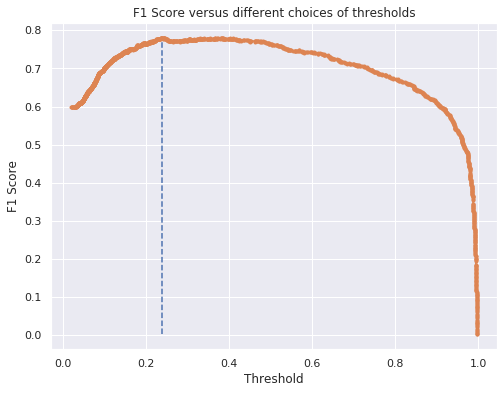

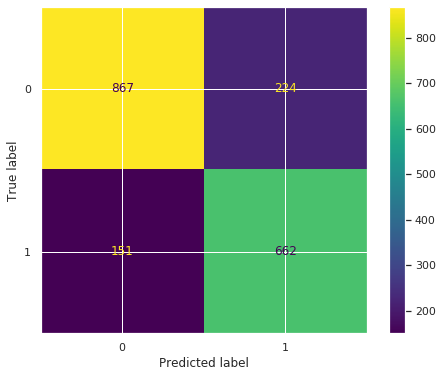

In [96]:
# Evaluation on the Validation sample
sns.set(rc={'figure.figsize':(8,6)})
keras_prediction = model.predict(x_val)
evaluation = classifier_performance(y_val,keras_prediction.squeeze())
evaluation.diagnostic()

# Output prediction for Kaggle

In [98]:
Kaggle_pred = model.predict(final_test_df).squeeze()

In [100]:
test_df['target'] = [1 if x > evaluation.threshold_highest_f1 else 0 for x in Kaggle_pred]

In [103]:
test_df[['id','target']].to_csv('kaggle_submission.csv', index = False)

In [106]:
!kaggle competitions submit -c nlp-getting-started -f kaggle_submission.csv -m "LSTM Gary"

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/ec2-user/.kaggle. Or use the environment method.
